# Cellulosic Ethanol TEA

TEA objects can perform cashflow analysis by using data from a System object. Additional arguments include operating days, lang factor, and income tax, as well as arguments for taking into account startup operation, construction schedule, and capital cost financing. Let's leverage the cellulosic ethanol TEA to retrive detailed TEA results.

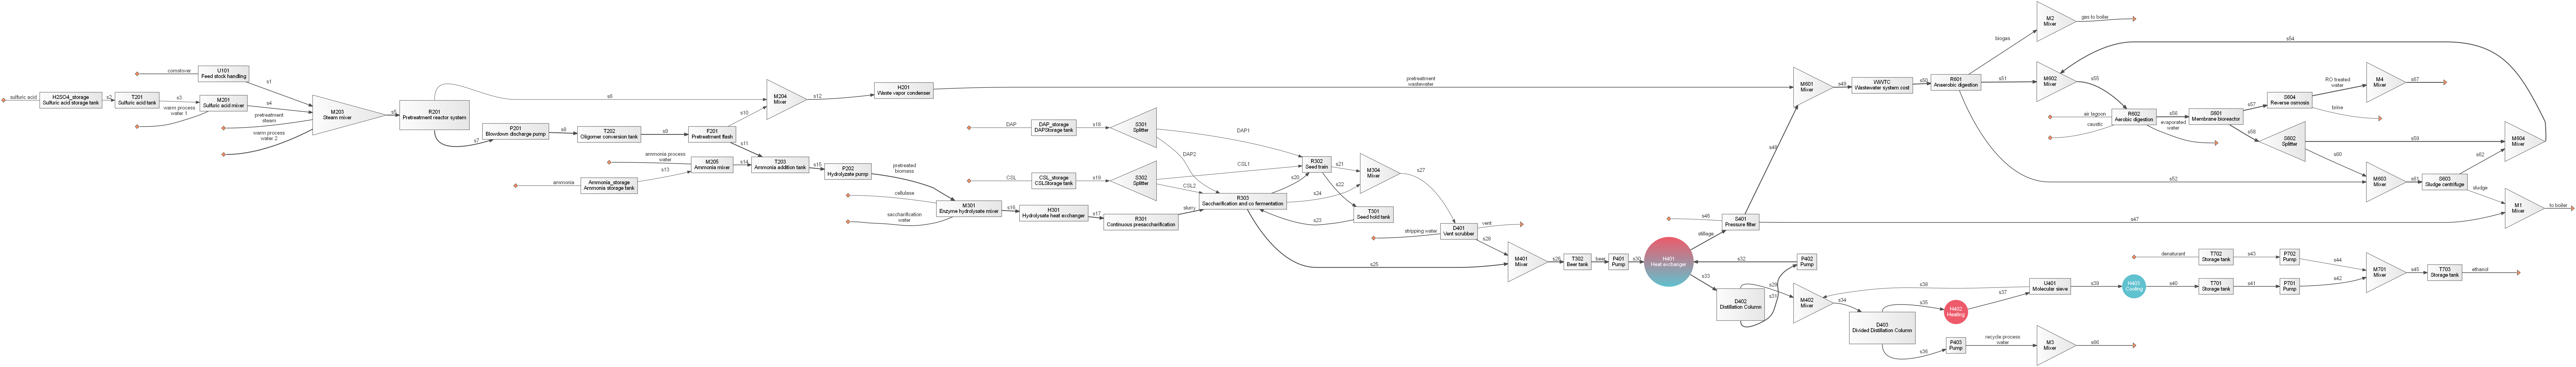

In [1]:
import biosteam as bst
from biorefineries import cellulosic
bst.nbtutorial()
cornstover_br = cellulosic.Biorefinery()
cornstover_br.system.diagram(format='png', facilities=False)

In [2]:
cornstover_br

Biorefinery(
    # dry at 20% moisture content
    feedstock='cornstover',
    # final product
    product='ethanol',
    # whether to model boiler/cooling tower blowdown to wastewater
    include_blowdown_recycle=False,
)


In [3]:
cornstover_br.tea

CellulosicEthanolTEA: cornstover_sys
NPV: 0 USD at 10.0% IRR


In [4]:
cornstover_br.tea.VOC_table(products=[cornstover_br.ethanol])

Price [$/MT] Cost [MM$/yr]
Raw materials           CSL                              56.8         0.617
                        DAP                               987          1.32
                        FGD lime                          199         0.608
                        Ammonia                           449          4.91
                        Boiler chemicals                5e+03        0.0208
                        Caustic                          74.8          2.58
                        Cellulase                         212          22.6
                        Cooling tower chemicals         3e+03        0.0507
                        Cornstover                       51.6          45.2
                        Denaturant                        756          3.01
                        Sulfuric acid                    89.7          1.45
Other utilities & fees  Electricity production   0.0572 $/kWh          11.6
                        Process water                    0.27        0.0333
Co-products & credits   Ash disposal                    -31.8        -0.182
Variable operating cost                                     0          94.2

In [5]:
cornstover_br.tea.FOC_table()

,Notes,Cost [MM$ / yr]
Labor salary,,2.5
Labor burden,90% of labor salary,2.25
Maintenance,3.0% of ISBL,2.56
Property insurance,0.7% of ISBL,0.597


In [6]:
cornstover_br.tea.CAPEX_table()

Notes  Cost [MM$]
Direct costs                   ISBL installed equipment cost                        85.4
                               OSBL installed equipment cost                         125
                               Warehouse                        4.0% of ISBL        3.41
                               Site development                 9.0% of ISBL        7.68
                               Additional piping                4.5% of ISBL        3.84
Total direct cost (TDC)                                                              225
Indirect costs                 Proratable costs                 10.0% of TDC        22.5
                               Field expenses                   10.0% of TDC        22.5
                               Construction                     20.0% of TDC          45
                               Contingency                      10.0% of TDC        22.5
                               Other (start-up, permits, etc.)  10.0% of TDC        22.5
Total indirect cost (TIC)                                                            135
Fixed capital investment (FCI)                                     TDC + TIC         360
Working capital (WC)                                             5.0% of FCI          18
Total capital investment (TCI)                                      FCI + WC         378

In [8]:
cornstover_br.tea.get_cashflow_table()
cornstover_br.system.save_report('report.xlsx')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.347841 to fit


### Example
Solve for the IRR at an ethanol price for 0.7

In [9]:
cornstover_br.ethanol.price = 0.7  # USD / kg
IRR = cornstover_br.tea.solve_IRR()
IRR

0.10459146440655558

Solve for the ethanol price at an IRR of 10%

In [12]:
cornstover_br.tea.IRR = 0.10
cornstover_br.tea.solve_price(cornstover_br.ethanol) # USD / kg

0.692364324402655

### Problem
Solve for the IRR at an ethanol price of 80 cents per kg.

In [16]:
cornstover_br.ethanol.price = 0.8  # USD / kg
IRR = cornstover_br.tea.solve_IRR()
IRR

0.1456130628762878

Solve for the ethanol price at an IRR of 5%.

In [17]:
cornstover_br.tea.IRR = 0.05
cornstover_br.tea.solve_price(cornstover_br.ethanol) # USD / kg

0.6285704676669372

In [18]:
dir(cornstover_br.tea)

['AOC',
 'Accounting',
 'CAPEX_table',
 'DPI',
 'FCI',
 'FOC',
 'FOC_table',
 'IRR',
 'ISBL_installed_equipment_cost',
 'NPV',
 'OSBL_installed_equipment_cost',
 'OSBL_units',
 'PBP',
 'ROI',
 'TCI',
 'TDC',
 'VOC',
 'VOC_table',
 'WC_over_FCI',
 '_AOC',
 '_DPI',
 '_DPI_cached',
 '_FCI',
 '_FCI_cached',
 '_FOC',
 '_IRR',
 '_ISBL_DPI',
 '_ISBL_DPI_cached',
 '_TDC',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_construction_schedule',
 '_depreciable_indirect_costs',
 '_depreciation',
 '_depreciation_array_from_key',
 '_depreciation_key',
 '_depreciation_key_from_name',
 '_duration',
 '_duration_array_cache',
 '_fill_depreciation_array',
 '_fill_

In [20]:
cornstover_br.tea.duration = (2020, 2060)
cornstover_br.tea.solve_price(cornstover_br.ethanol)

0.6139784614404467